<a href="https://colab.research.google.com/github/byhqsr/CodeRepo/blob/main/Final_CloudAce_Customer_Churn_EDA_%26_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data and Packages

Data source : https://www.kaggle.com/blastchar/telco-customer-churn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/My\ Drive/Telco_Churn.csv /content/

Mounted at /content/drive


In [ ]:
# Import Packages
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

# Analysis pkg
import random
import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport

# Data Vis pkg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.text import Text

# Machine Learning Packages

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE,RFECV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score, log_loss

# Set pandas max column & rows & width views
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.set_option('display.max_colwidth', None)


## Exploratory Data Analysis

### Read Dataframe

In [ ]:
# Read Dataframe
df = pd.read_csv('Telco_Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Checking Data Status

In [ ]:
#Data Type Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset has no missing values.
We have more than 7000 rows and 21 attributes (columns).



In [ ]:
#Checking Unique Values for each columns
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name, ': ',df[column_name].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

Numerical features: 
1. Tenure
2. Monthly Charges
3. Total Charges


Categorical features. This dataset has 16 categorical features:
1. Six features with binary features (1/0; Yes/No)
2. Nine features with three unique values each (categories)
3. One feature with four unique values
4. One feature with two unique values (Female/Male)


Total Charges should be numerical but saved as object. 

### Check Target Prediction

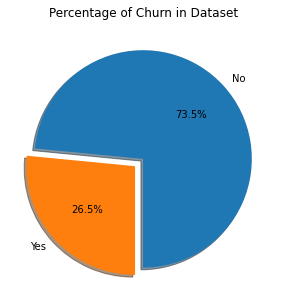

In [ ]:
# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot

plt.pie(sizes,labels=['No','Yes'],explode=[0,0.1],
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

We see that Target Class is imbalance. This will affects how we evaluate our model


Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be **transformed into numbers first**, before you can apply the learning algorithm on them. 




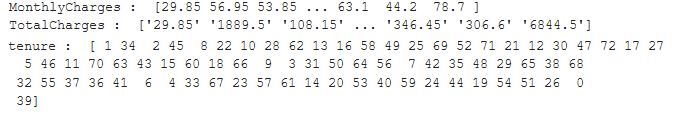

Data Range for each variable are different. For parametric machine learning model like Logistic Regression, variables that are measured at different scales do not contribute equally to the model fitting and will make model coefficient interpretation difficult. We will **standardize** the variables before applying any machine learning model.

Let's fix some problem in data cleaning.

## Data Cleaning

###Convert Total Charges data into numerical

In [ ]:
# column total charge is string and there are empty string values, convert that to np.nan
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
# convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
#check data status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###Fill missing values to 0

In [ ]:
# After convert Total Charges column to numeric, we found that it has missing values. Fill missing values to 0
df = df.fillna(value=0)

In [ ]:
#check data status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###Checking Distribution Data (Numerical Data)

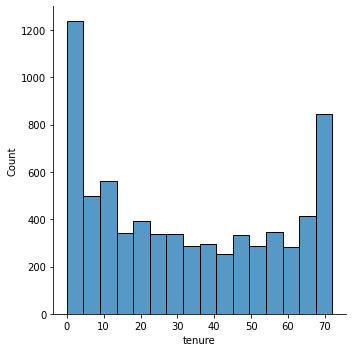

In [ ]:
#Tenure Data
sns.displot(data=df, x="tenure")

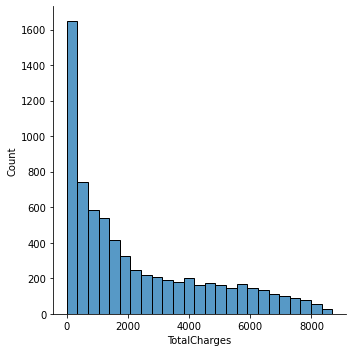

In [ ]:
#Total Charges Data
sns.displot(data=df, x="TotalCharges")

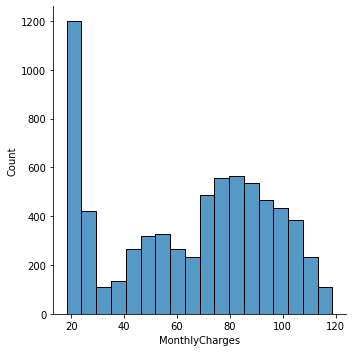

In [ ]:
#Monthly Charges Data
sns.displot(data=df, x="MonthlyCharges")

###Replace Target variable to numeric and convert other categorical variables into indicator variables 

In [ ]:
def clean_data(df):
  #Drop unnecessary variable
  df = df.drop(['customerID'], axis=1)

  #Replace Yes/No into 1 or 0
  df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)
  df['PaperlessBilling'].replace(to_replace='No', value=0, inplace=True)
  df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)

  df['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)
  df['PhoneService'].replace(to_replace='No', value=0, inplace=True)
  df['PhoneService'] = df['PhoneService'].astype(int)

  df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
  df['Dependents'].replace(to_replace='No', value=0, inplace=True)
  df['Dependents'] = df['Dependents'].astype(int)

  df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
  df['Partner'].replace(to_replace='No', value=0, inplace=True)
  df['Partner'] = df['Partner'].astype(int)

  df['gender'].replace(to_replace='Male', value=1, inplace=True)
  df['gender'].replace(to_replace='Female', value=0, inplace=True)
  df['gender'] = df['gender'].astype(int)

  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
  df['Churn'].replace(to_replace='No', value=0, inplace=True)
  df['Churn'] = df['Churn'].astype(int)

  #pd.get_dummies creates a new dataframe which consists of 1 and 0
  non_dummy_cols = ['PaperlessBilling','PhoneService','gender','Dependents','Partner','SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn'] 
  # Takes all 11 other columns
  dummy_cols = list(set(df.columns) - set(non_dummy_cols))
  df = pd.get_dummies(df, columns=dummy_cols)
  df = pd.get_dummies(df)

  #Strandarize numerical variable using StandardScaler
  scaler = StandardScaler()
  df[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(df[['MonthlyCharges','TotalCharges','tenure']])

  return df

df = clean_data(df)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.127605,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,1,1.613701,1,1,1.277533,2.242606,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.852932,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.870513,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
#check data status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

###Checking New Distribution Data (Numerical Data)

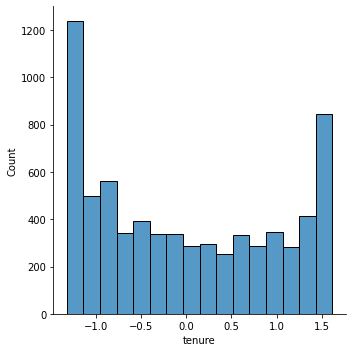

In [ ]:
#Tenure Data
sns.displot(data=df, x="tenure")

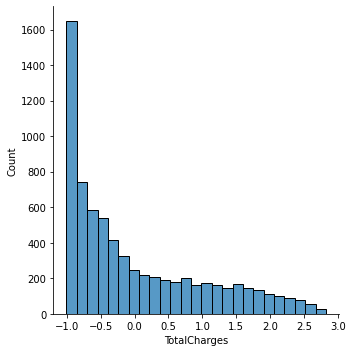

In [ ]:
#Total Charges Data
sns.displot(data=df, x="TotalCharges")

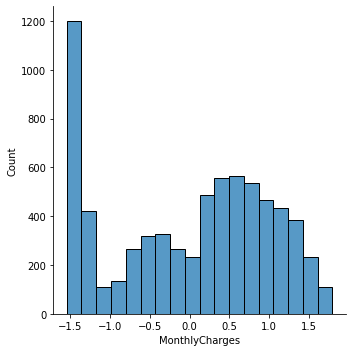

In [ ]:
#Monthly Charges Data
sns.displot(data=df, x="MonthlyCharges")

## Model Selection & Training

- Feature selection: techniques that select a subset of the most relevant features. It can reduces the complexity of a model and improves the model performance if the right subset is chosen

  Method : Recursive Feature Elimination (RFE)

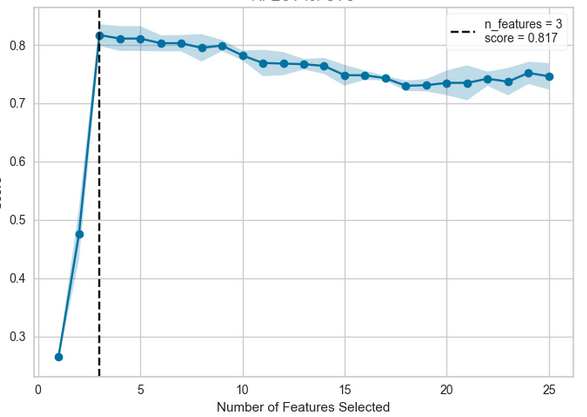

- Hyperparameter Tuning: tuning the parameters to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least.

  Method :Gridsearch CV

- Cross Validation: to evaluate machine learning model's ability to predict new data, in order to flag problems like overfitting or bias and to estimate how the model is expected to perform in general (i.e., an unknown dataset, for instance from a real problem)

  Method: StratifiedKFold. It shuffles the data and splits the data into n_splits parts. It will use each part as a test set.

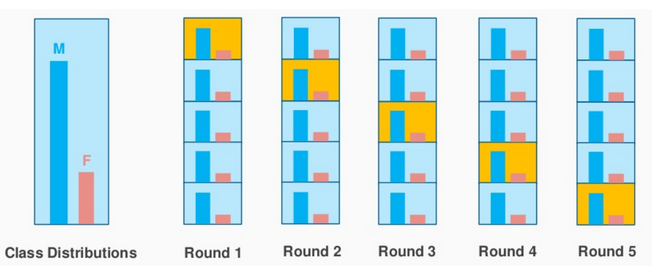



- Model Evaluation 

  Method: Using f1 score from confusion matrix. F1 can be interpreted as weighted average of the precision and recall.
  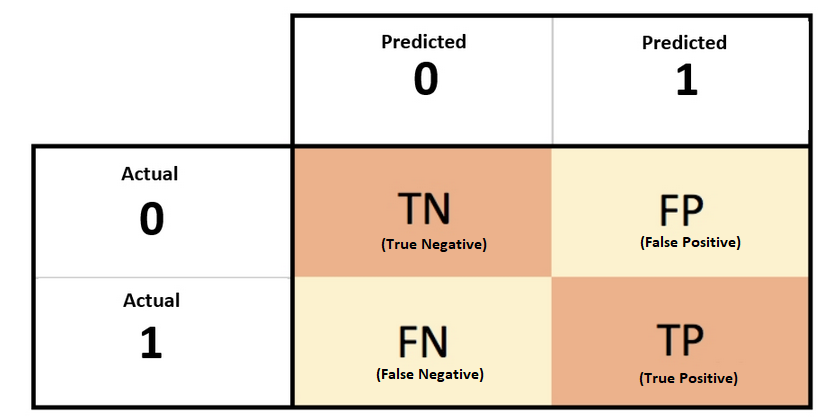

Accuracy = total correct prediction / all prediction 

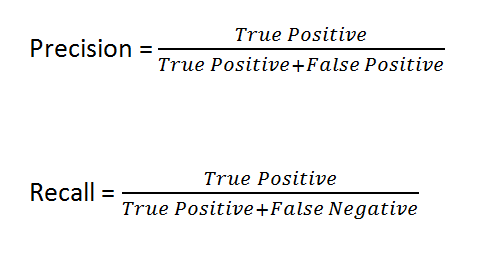



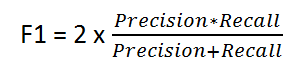

Machine Learning Model (Supervised, Classification)

Parametric Model:
- Logistic Regression: supervised learning algorithm for both classification and regression. Logistic regression is used to predict the probability of a binary variable (1/0, Yes/No) . Parametric model, output : coefficient (similar to linear regression, but coefficients related to ods (P(Yes)/P(No))

Tree Based model:
- Decision Tree: supervised learning algorithm for both classification and regression. Decision Tree is like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

- Random Forest:  supervised learning algorithm for both classification and regression. Random Forest creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting)


###Baseline Model

Accuracy_score on test set: 0.7310149041873669
AUC Loss score on test set: 0.5
f1 score on test set: 0.0
recall score on test set: 0.0
confusion matrix on test set:



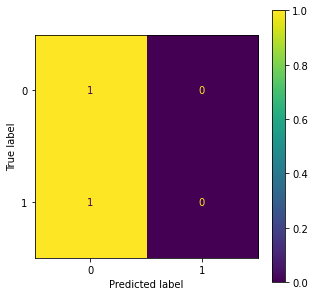

In [ ]:
y = df['Churn'].values
X = df.drop(['Churn'],axis = 1)


#Split Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = DummyClassifier(strategy="most_frequent")
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test) 

# Accuracy
print("Accuracy_score on test set:",accuracy_score(y_test, y_test_pred))

# AUC score
print("AUC Loss score on test set:",roc_auc_score(y_test, y_test_pred))

# f1 score
print("f1 score on test set:",f1_score(y_test, y_test_pred))

# recall score
print("recall score on test set:",recall_score(y_test, y_test_pred))

# confusion matrix
#print("confusion matrix on test set:\n", confusion_matrix(y_test, y_test_pred))
print("confusion matrix on test set:\n")
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

plt.show()

###Logistic Regression Model

Number of Selected Features: 20
Selected Features: ['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_Two year', 'OnlineBackup_No internet service', 'PaymentMethod_Electronic check', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'DeviceProtection_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'TechSupport_No internet service']
Best Parameter: {'estimator__C': 7.742636826811269, 'estimator__penalty': 'l2'}
Accuracy_score on test set: 0.751596877217885
f1 score on test set: 0.6228448275862069
recall score on test set: 0.8304597701149425
confusion matrix on test set:



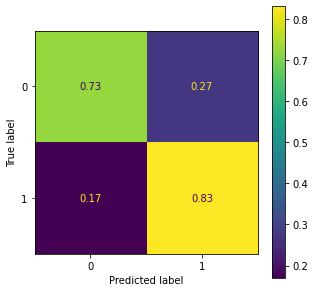

In [ ]:
y = df['Churn'].values
X = df.drop(['Churn'],axis = 1)


#Split Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#Tuning Parameter with GridSearchCV

params = {
    'estimator__penalty' : ('l1', 'l2'),
    'estimator__C' : np.logspace(0,4,10)
}

estimator = LogisticRegression(random_state=0,class_weight="balanced")
selector = RFE(estimator, step=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
clf = GridSearchCV(selector, params, cv=kfold,scoring='f1')
clf.fit(X_train, y_train)
    

# Apply prediction to train and test data to check model accuracy and whether the model is overfit or no
# using the best parameter obtained from grid search

y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test) 

print("Number of Selected Features:",clf.best_estimator_.n_features_)
features=list(X.columns[clf.best_estimator_.support_])
print("Selected Features:",features)
# Best Parameters
print("Best Parameter:",clf.best_params_)

# Accuracy
print("Accuracy_score on test set:",accuracy_score(y_test, y_test_pred))

# AUC score
#print("AUC Loss score on test set:",roc_auc_score(y_test, y_test_pred))

# f1 score
print("f1 score on test set:",f1_score(y_test, y_test_pred))

# recall score
print("recall score on test set:",recall_score(y_test, y_test_pred))

# confusion matrix
print("confusion matrix on test set:\n")

plot_confusion_matrix(clf, X_test, y_test, normalize='true')

plt.show()

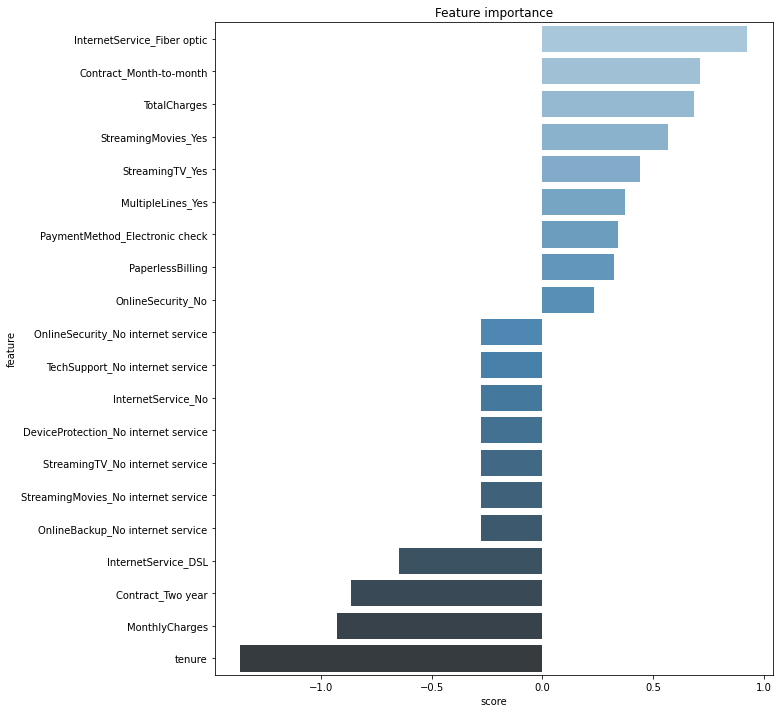

In [ ]:
score_fi = clf.best_estimator_.estimator_.coef_
score_fi=score_fi.reshape((20, 1))
score_fi_df = pd.DataFrame(data=score_fi, columns=["score"])
features = list(X.columns[clf.best_estimator_.support_])
features_df = pd.DataFrame(data=features, columns=["feature"])
feature_importance = pd.concat([features_df, score_fi_df], axis=1)
feature_importance=feature_importance.sort_values(by=['score'], ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=feature_importance["feature"], x=feature_importance["score"], palette="Blues_d", orient='h')

###Decision Tree Model

Number of Selected Features: 20
Selected Features: ['SeniorCitizen', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'OnlineBackup_No', 'PaymentMethod_Electronic check', 'MultipleLines_No', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'DeviceProtection_No', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'OnlineSecurity_No', 'TechSupport_No']
Best Parameter: {'estimator__max_depth': 6, 'estimator__min_samples_leaf': 1}
Accuracy_score on test set: 0.7260468417317246
f1 score on test set: 0.5979166666666665
recall score on test set: 0.8247126436781609
confusion matrix on test set:



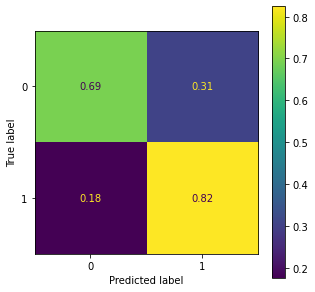

In [ ]:
y = df['Churn'].values
X = df.drop(['Churn'],axis = 1)


#Split Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#Tuning Parameter with GridSearchCV

params = {
 #         'estimator__max_depth': [4, 8, None],
 #         'estimator__class_weight': ['balanced', None]
        'estimator__min_samples_leaf': (1,5,10),  
        'estimator__max_depth': (6,8,10)
}

estimator = DecisionTreeClassifier(random_state=0,class_weight="balanced")
selector = RFE(estimator, step=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
clf = GridSearchCV(selector, params, cv=kfold,scoring='f1')
clf.fit(X_train, y_train)
    

# Apply prediction to train and test data to check model accuracy and whether the model is overfit or no
# using the best parameter obtained from grid search

y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test) 

print("Number of Selected Features:",clf.best_estimator_.n_features_)
features=list(X.columns[clf.best_estimator_.support_])
print("Selected Features:",features)

# Best Parameters
print("Best Parameter:",clf.best_params_)

# Accuracy
print("Accuracy_score on test set:",accuracy_score(y_test, y_test_pred))

# AUC score
#print("AUC Loss score on test set:",roc_auc_score(y_test, y_test_pred))

# f1 score
print("f1 score on test set:",f1_score(y_test, y_test_pred))

# recall score
print("recall score on test set:",recall_score(y_test, y_test_pred))

# confusion matrix
print("confusion matrix on test set:\n")

plot_confusion_matrix(clf, X_test, y_test, normalize='true')

plt.show()

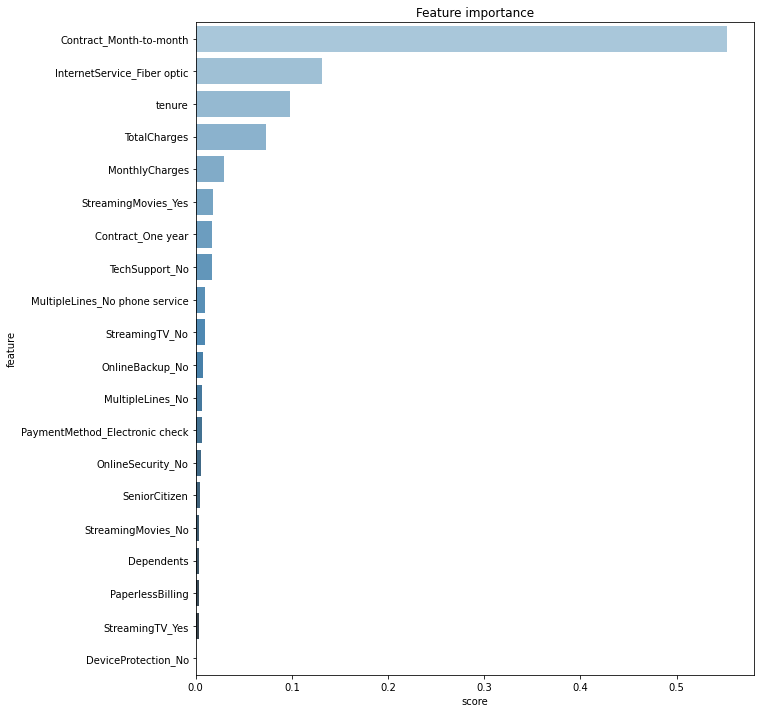

In [ ]:
# Plot features importances
score_fi =clf.best_estimator_.estimator_.feature_importances_
score_fi_df = pd.DataFrame(data=score_fi, columns=["score"])
features = list(X.columns[clf.best_estimator_.support_])
features_df = pd.DataFrame(data=features, columns=["feature"])
feature_importance = pd.concat([features_df, score_fi_df], axis=1)
feature_importance = feature_importance.sort_values(by=['score'], ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=feature_importance["feature"], x=feature_importance["score"], palette="Blues_d", orient='h')

###Random Forest Model

Number of Selected Features: 20
Selected Features: ['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'StreamingTV_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'TechSupport_No', 'TechSupport_No internet service', 'PaymentMethod_Electronic check', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'InternetService_DSL', 'InternetService_Fiber optic']
Best Parameter: {'estimator__max_depth': 8, 'estimator__min_samples_leaf': 10}
Accuracy_score on test set: 0.7650816181689141
AUC Loss score on test set: 0.7793246991019098
f1 score on test set: 0.6293393057110862
recall score on test set: 0.8074712643678161
confusion matrix on test set:



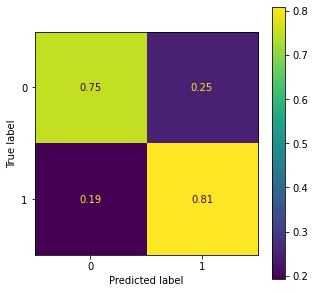

In [ ]:
y = df['Churn'].values
X = df.drop(['Churn'],axis = 1)


#Split Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#Tuning Parameter with GridSearchCV

params = {
        'estimator__min_samples_leaf': (1,5,10),  
        'estimator__max_depth': (6,8,10)
}

estimator = RandomForestClassifier(random_state=0,class_weight="balanced")
selector = RFE(estimator, step=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
clf = GridSearchCV(selector, params, cv=kfold,scoring='f1')
clf.fit(X_train, y_train)
    

# Apply prediction to train and test data to check model accuracy and whether the model is overfit or no
# using the best parameter obtained from grid search

y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test) 

print("Number of Selected Features:",clf.best_estimator_.n_features_)
features=list(X.columns[clf.best_estimator_.support_])
print("Selected Features:",features)

# Best Parameters
print("Best Parameter:",clf.best_params_)

# Accuracy
print("Accuracy_score on test set:",accuracy_score(y_test, y_test_pred))

# AUC score
print("AUC Loss score on test set:",roc_auc_score(y_test, y_test_pred))

# f1 score
print("f1 score on test set:",f1_score(y_test, y_test_pred))

# recall score
print("recall score on test set:",recall_score(y_test, y_test_pred))

# confusion matrix
#print("confusion matrix on test set:\n",confusion_matrix(y_test, y_test_pred))

# confusion matrix
print("confusion matrix on test set:\n")

plot_confusion_matrix(clf, X_test, y_test, normalize='true')

plt.show()



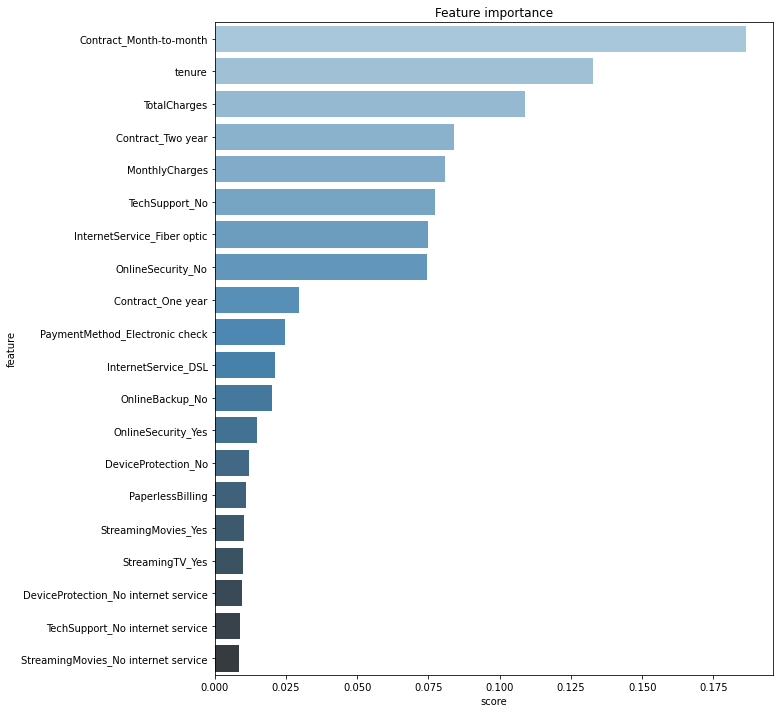

In [ ]:
# Plot features importances
score_fi =clf.best_estimator_.estimator_.feature_importances_
score_fi_df = pd.DataFrame(data=score_fi, columns=["score"])
features = list(X.columns[clf.best_estimator_.support_])
features_df = pd.DataFrame(data=features, columns=["feature"])
feature_importance = pd.concat([features_df, score_fi_df], axis=1)
feature_importance = feature_importance.sort_values(by=['score'], ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=feature_importance["feature"], x=feature_importance["score"], palette="Blues_d", orient='h')

Conclusion:

In [ ]:
Feature Selection for each model: 20 features.
Selected Features: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 
                    'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                    'OnlineSecurity_No', 'StreamingMovies_No', 'StreamingMovies_Yes', 'TechSupport_No', 'MultipleLines_No', 
                    'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineBackup_No', 'OnlineBackup_Yes', 'PaymentMethod_Electronic check']

###Evaluation Result

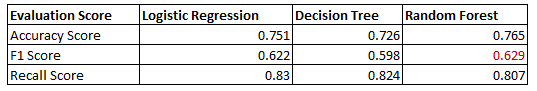


From the result, Random Forest is the best machine learning model. The F1 score is the highest score among other models.


##Next

Model is still not optimal
1. Havent try more hyperparameter which might increase model performance

2. Try creating additional features which might increase model performance (feature engineering)

2. Data is imbalanced, so far we havent deal much about this because the imbalance is not that huge, and optimizing for f1 already give good score, but to really improve performance there are two ways:
a. Adjusting classifcation treshold (not default 0.5)
b. over/under sampling the training data


Next we will see demo by cloudace, in which it will automate the hyperparameter tuning and classification treshold tuning. 